In [2]:
import numpy as np 
#aqui estoy importando la libreria de numpy
import pandas as pd
#aqui estoy importando la libreria de pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.DataFrame(np.load("proyecto_training_data.npy"),columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
#creo la variable df para poder verla luego, esta variale incluye lo siguiente
#llama un Dataframe con panda, con los datos del proyecto_training_data que se carga con numpy, adentro del dataframe coloco una coma y pongo columns 
#para darle nombre a las columnas 
print(df)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]


In [4]:
filas , columnas = df.shape
print(filas) #tomar en cuenta el index empieza en 0 por eso marca 1459, en vez de 1460
print(columnas)

1460
6


In [5]:
#usare shuffle para poder colocar los datos de forma aleatoria
np.random.shuffle(df.values)
#voy a separar los datos en 80% de entrenamiento y el 20% de validacion
Cantidad_filas_Entrenamiento =int(0.8*len(df))
#necesito hacer dos subconjuntos, usare iloc
set_Entrenamiento = df.iloc[:Cantidad_filas_Entrenamiento]
set_validacion = df.iloc[Cantidad_filas_Entrenamiento:]

print(set_Entrenamiento)
print('--------')
print(set_validacion)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      196000.0          6.0    1567.0           5.0     1977.0          NaN
1      104000.0          6.0     929.0           8.0     1912.0         92.0
2      119900.0          5.0     965.0           6.0     1965.0         60.0
3      244000.0          7.0    2110.0           8.0     1968.0         93.0
4      224000.0          7.0    1358.0           6.0     2009.0         44.0
...         ...          ...       ...           ...        ...          ...
1163   103000.0          4.0     848.0           5.0     1925.0         52.0
1164   171750.0          7.0    1405.0           6.0     2003.0          NaN
1165   231500.0          6.0     928.0           7.0     1997.0         65.0
1166   244400.0          7.0    1207.0          10.0     1940.0          NaN
1167   176000.0          6.0    1382.0           6.0     1962.0        120.0

[1168 rows x 6 columns]
--------
      SalePrice  OverallQual  1stFlrSF  To

In [6]:
def getDFDataTypes(df):
    continuas = []
    discretas  = []
    categoricas = [] 
    for col in df.columns.values:
        if((df[col].dtype == 'int64') or (df[col].dtype == 'float64')):
            cantidad = len(df[col].value_counts())
            if(cantidad >= 30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return continuas, discretas, categoricas
continuas, discretas, categoricas = getDFDataTypes(df)
print('continuas:',continuas)
print('discretas:',discretas)
print('categoricas:',categoricas)

continuas: ['SalePrice', '1stFlrSF', 'YearBuilt', 'LotFrontage']
discretas: ['OverallQual', 'TotRmsAbvGrd']
categoricas: []


### Analisis Exploratorio de datos para cada variable.

In [7]:
#sacando datos para la primera variable, 
col1 = set_Entrenamiento.to_numpy()[:,0]
Sale_Price_media = np.round((np.mean(col1)),2)
Sale_Price_Max = np.max(col1)
Sale_Price_Min = np.min(col1)
Sale_Price_Rango = np.ptp(col1)
Sale_Price_Desves = np.round((np.std(col1)),2)
Exploracion_Precio = [Sale_Price_media,Sale_Price_Max,Sale_Price_Min,Sale_Price_Rango,Sale_Price_Desves]
Exploracion_Precio

[182004.73, 745000.0, 35311.0, 709689.0, 79153.59]

In [8]:
#Exploracion segunda variable, 
col2 = set_Entrenamiento.to_numpy()[:,1]
Overall_media = np.round((np.mean(col2)),2)
Overall_Max = np.max(col2)
Overall_Min = np.min(col2)
Overall_Rango = np.ptp(col2)
Overall_Desves = np.round((np.std(col2)),2)
Exploracion_Overall = [Overall_media,Overall_Max,Overall_Min,Overall_Rango,Overall_Desves]



In [9]:
#Exploracion tercera variable, 
col3 = set_Entrenamiento.to_numpy()[:,2]
firstfloor_media = np.round((np.mean(col3)),2)
firstfloor_Max = np.max(col3)
firstfloor_Min = np.min(col3)
firstfloor_Rango = np.ptp(col3)
firstfloor_Desves = np.round((np.std(col3)),2)
Exploracion_firstfloor = [firstfloor_media,firstfloor_Max,firstfloor_Min,firstfloor_Rango,firstfloor_Desves]

In [10]:
#Exploracion cuarta variable, 
col4 = set_Entrenamiento.to_numpy()[:,3]
Rooms_media = np.round((np.mean(col4)),2)
Rooms_Max = np.max(col4)
Rooms_Min = np.min(col4)
Rooms_Rango = np.ptp(col4)
Rooms_Desves = np.round((np.std(col4)),2)
Exploracion_Rooms = [Rooms_media,Rooms_Max,Rooms_Min,Rooms_Rango,Rooms_Desves]

In [11]:
#Exploracion quinta variable, 
col5 = set_Entrenamiento.to_numpy()[:,4]
Year_media = np.round((np.mean(col5)),2)
Year_Max = np.max(col5)
Year_Min = np.min(col5)
Year_Rango = np.ptp(col5)
Year_Desves = np.round((np.std(col5)),2)
Exploracion_Year = [Year_media,Year_Max,Year_Min,Year_Rango,Year_Desves]

In [12]:
#Exploracion sexta variable, 
col6 = set_Entrenamiento.to_numpy()[:,5]
Frontage_media = np.round((np.nanmean(col6)),2)
Frontage_Max = np.nanmax(col6)
Frontage_Min = np.nanmin(col6)
Frontage_Rango = Frontage_Max-Frontage_Min #realice la resta ya que ptp no acepta datos nan
Frontage_Desves = np.round((np.nanstd(col6)),2)
Frontage_Overall = [Frontage_media,Frontage_Max,Frontage_Min,Frontage_Rango,Frontage_Desves]

In [13]:
#haciendo una tabla con los datos
Dato_Estadistico = ['Sales Price','Overall Quall','First Floor','Rooms','Year Build','Frontage']
Media = [Sale_Price_media,Overall_media,firstfloor_media,Rooms_media,Year_media,Frontage_media]
Maximo = [Sale_Price_Max,Overall_Max,firstfloor_Max,Rooms_Max,Year_Max,Frontage_Max]
Minimo = [Sale_Price_Min,Overall_Min,firstfloor_Min,Rooms_Min,Year_Min,Frontage_Min]
Rango = [Sale_Price_Rango,Overall_Rango,firstfloor_Rango,Rooms_Rango,Year_Rango,Frontage_Rango]
Desviacion = [Sale_Price_Desves,Overall_Desves,firstfloor_Desves,Rooms_Desves,Year_Desves,Frontage_Desves]


In [14]:
Tabla_Exploracion = { 'Datos': Dato_Estadistico,
         'Medias': pd.Series( Media),
         'Maximos': pd.Series(Maximo),
         'Minimos':pd.Series(Minimo),
         'Rango':pd.Series(Rango),
         'Desviacion Estandar':pd.Series(Desviacion),
     }
df1 = pd.DataFrame(Tabla_Exploracion)
df1

,Datos,Medias,Maximos,Minimos,Rango,Desviacion Estandar
0,Sales Price,182004.73,745000.0,35311.0,709689.0,79153.59
1,Overall Quall,6.13,10.0,1.0,9.0,1.39
2,First Floor,1169.83,4692.0,334.0,4358.0,394.49
3,Rooms,6.57,14.0,2.0,12.0,1.64
4,Year Build,1970.88,2010.0,1872.0,138.0,30.42
5,Frontage,70.60,313.0,21.0,292.0,24.99


### 4. Histograma  para cada variable  del Dataset

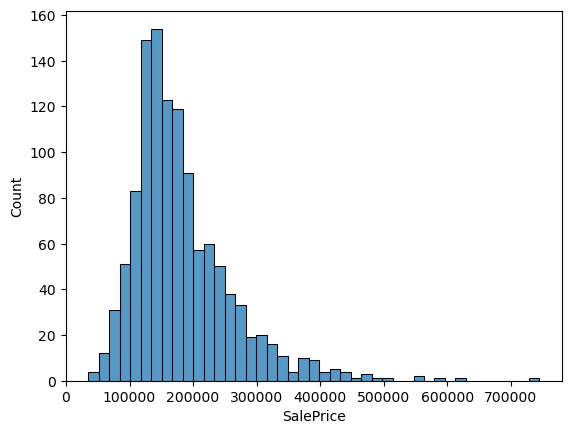

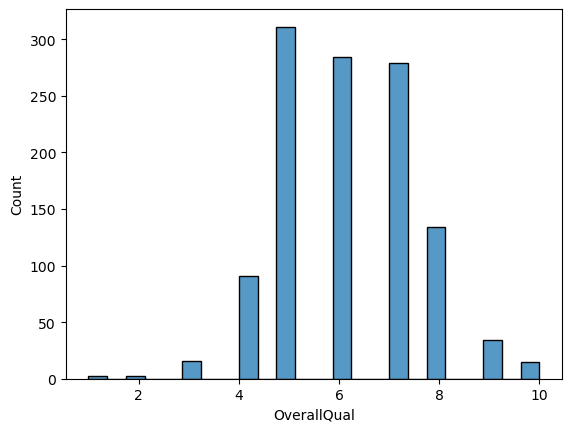

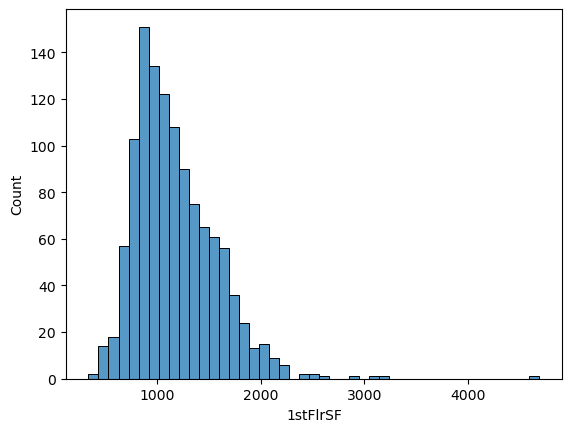

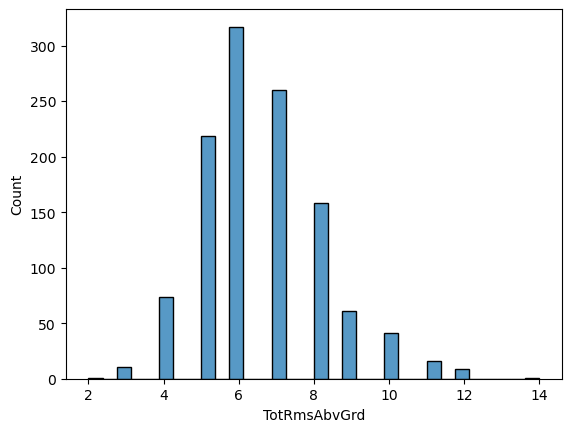

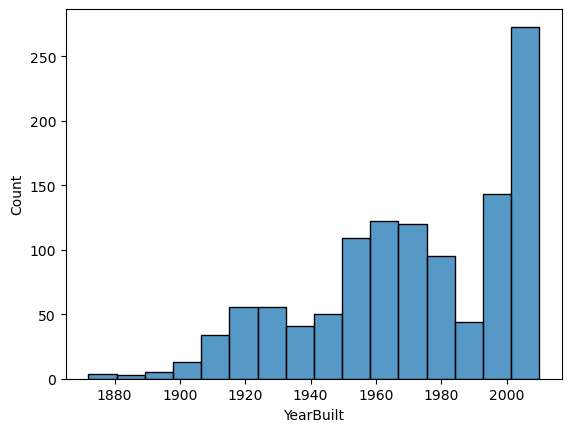

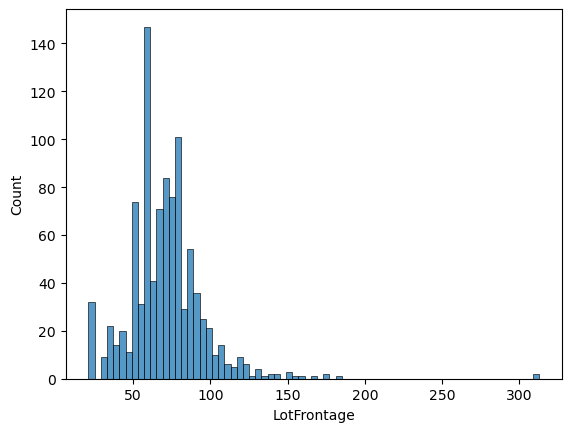

In [15]:
for variables in set_Entrenamiento.columns:
    sns.histplot(set_Entrenamiento[variables].dropna())
    #use Histplot ya que el programa me mostraba un mensaje que distplot dejaria de utilizarse
    #por lo cual pedia cambiar a histplot o displot 
    plt.show()


### 5. Para cada variable independiente X calcular"

#### Coeficiente de correlacion entre x y y 

In [16]:
#Coeficiente de correlacion con primera variable 
print(set_Entrenamiento.columns)
correlacion1 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["OverallQual"])
correlacion2 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["1stFlrSF"])
correlacion3 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["TotRmsAbvGrd"])
correlacion4 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["YearBuilt"])
correlacion5 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["LotFrontage"])

Tabla_Correlaciones = { 'Variable': ("OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"),
         'Correlacion': (correlacion1,correlacion2,correlacion3,correlacion4,correlacion5),
     }
df2 = pd.DataFrame(Tabla_Correlaciones)
df2


Index(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt',
       'LotFrontage'],
      dtype='object')


,Variable,Correlacion
0,OverallQual,0.791815
1,1stFlrSF,0.600324
2,TotRmsAbvGrd,0.525665
3,YearBuilt,0.520191
4,LotFrontage,0.359147


#### Graficos para cada relacion

Text(0.5, 1.0, 'Sale_Price vs LotFrontage con una Correlacion de:0.35914736126430674')

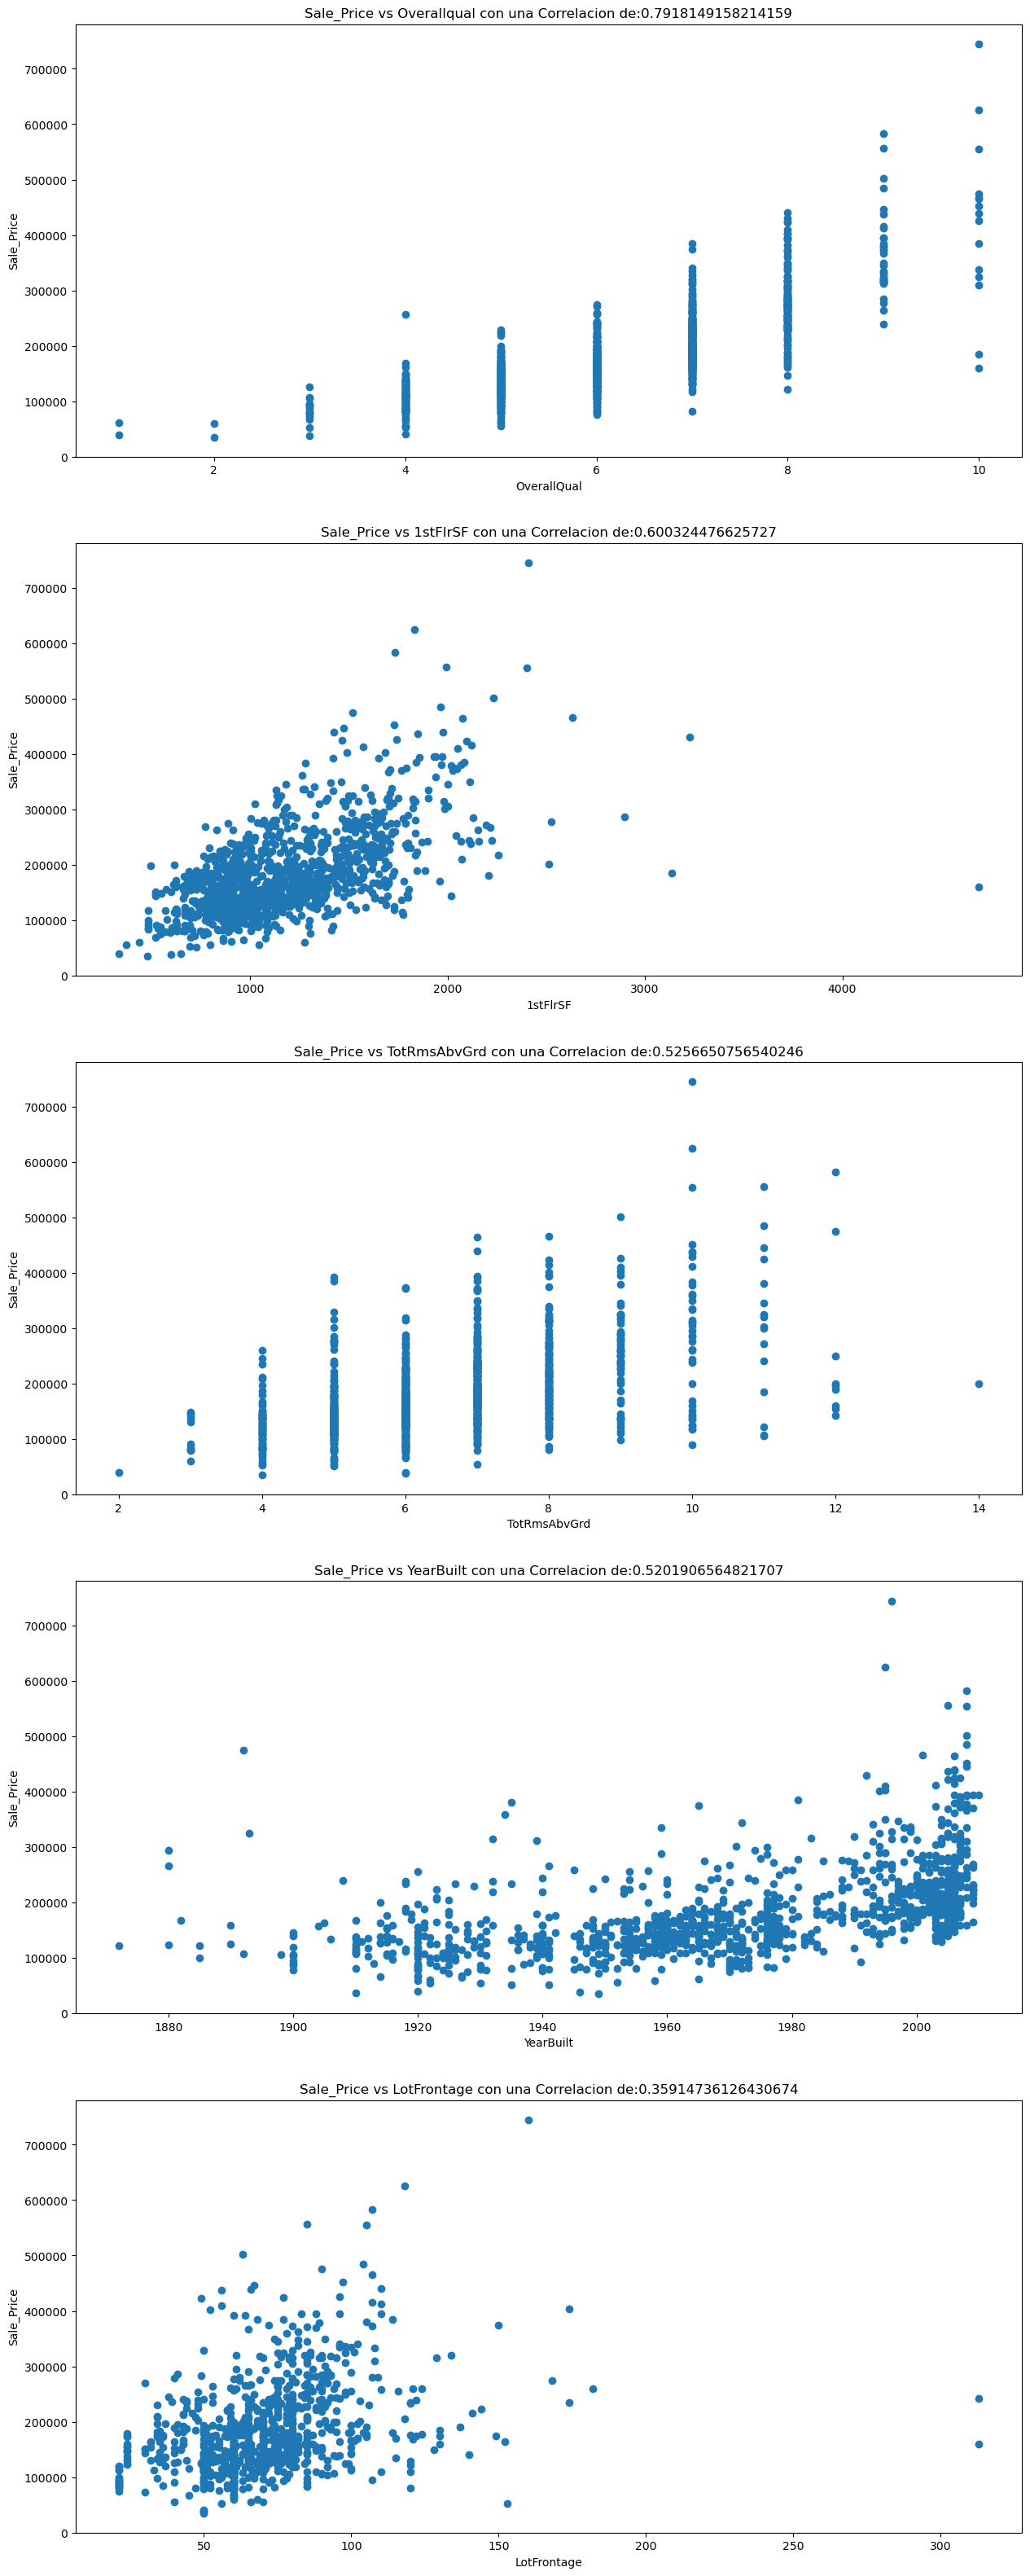

In [17]:
#al intentar hacerlo en una grafica se superponen los datos por lo cual 
#voy a usar subplots 

fig, sca =plt.subplots(5,1, figsize =(15,40))
sca[0].scatter(set_Entrenamiento["OverallQual"],set_Entrenamiento["SalePrice"])
sca[1].scatter(set_Entrenamiento["1stFlrSF"],set_Entrenamiento["SalePrice"])
sca[2].scatter(set_Entrenamiento["TotRmsAbvGrd"],set_Entrenamiento["SalePrice"])
sca[3].scatter(set_Entrenamiento["YearBuilt"],set_Entrenamiento["SalePrice"])
sca[4].scatter(set_Entrenamiento["LotFrontage"],set_Entrenamiento["SalePrice"])
#PARA PODER COLOCAR TITULO Y EJES:
sca[0].set_xlabel('OverallQual')
sca[0].set_ylabel('Sale_Price')
sca[0].set_title('Sale_Price vs Overallqual con una Correlacion de:'+ str(correlacion1))

sca[1].set_xlabel('1stFlrSF')
sca[1].set_ylabel('Sale_Price')
sca[1].set_title('Sale_Price vs 1stFlrSF con una Correlacion de:'+ str(correlacion2))

sca[2].set_xlabel('TotRmsAbvGrd')
sca[2].set_ylabel('Sale_Price')
sca[2].set_title('Sale_Price vs TotRmsAbvGrd con una Correlacion de:' +str(correlacion3))

sca[3].set_xlabel('YearBuilt')
sca[3].set_ylabel('Sale_Price')
sca[3].set_title('Sale_Price vs YearBuilt con una Correlacion de:' +str(correlacion4))

sca[4].set_xlabel('LotFrontage')
sca[4].set_ylabel('Sale_Price')
sca[4].set_title('Sale_Price vs LotFrontage con una Correlacion de:' +str(correlacion5)) #los concateno ya que el set_title solo admite candea y por eso paso correlacion a str

### escogiendo variables
#### las variables elegidas para el analisis son overallQual y 1stflrsf

In [18]:
#haciendo diccionario de correlaciones
correlaciones_dic = {"OverallQuall": correlacion1, "1stFlrSF": correlacion2, "TotRmsAbvGrd": correlacion3, "YearBuilt": correlacion4, "LotFrontage": correlacion5}
# Ordenamos los elementos del diccionario según sus valores en orden descendente
correlaciones_dic_ordenada = sorted(correlaciones_dic.items(), key=lambda x: x[1], reverse=True)
# Tomamos los dos últimos elementos de la lista, que son los dos valores más grandes
variable1, valor1 = correlaciones_dic_ordenada[0]
variable2, valor2 = correlaciones_dic_ordenada[1]
print(variable1, valor1) 
print(variable2, valor2)  

OverallQuall 0.7918149158214159
1stFlrSF 0.600324476625727


## 6. Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 +β1 ∗x.


In [19]:
def regresion_lineal (x,y,epoch,imprimir_error,alpha):
    modelos = []
    errores = []
    n = len(x)
    x = np.array([x,np.ones(len(x))])
    betas = np.array([0,0])

    for i in range(epoch):
        y_calcu = np.dot(betas,x)
        error = ((1 / (2 * n)) * np.sum(np.square(y - y_calcu)))
        errores.append(error)
        modelos.append({ i : betas})
        betagrad = (1 / n ) * np.dot((y_calcu - y), x.T)
        betas = betas - (alpha * betagrad)
        if (i % imprimir_error == 0):
            print(f'Epoch: {i}, Error: {error}')

    return modelos, errores


In [20]:
def display_error (errores2):
    plt.clf()
    plt.plot(errores2)
    plt.xlabel('Iteraciones')
    plt.ylabel('Errores')
    plt.title('Errores vs iteraciones')  
    plt.show() 

In [21]:
def recta_data (modelos,n,x,y):
    n_modelos = modelos[::n]
    betas_modelos = [list(d.values())[0] for d in n_modelos]
    plt.figure()
    plt.scatter(x,y)
    plt.xlabel('variable independiente')
    plt.ylabel('SalePrice')
    plt.title('independiente vs salePrice') 
    for modelo in betas_modelos:
        x_vals = np.linspace(min(x),max(x),1000)
        y_vals = modelo[0] * x_vals + modelo[1]
        plt.plot(x_vals, y_vals)
    plt.show()

## Entrenando modelo utilizando la variable OverallQual

Epoch: 0, Error: 19695506210.362156
Epoch: 10, Error: 18272407230.52975
Epoch: 20, Error: 16960064556.733564
Epoch: 30, Error: 15749858158.074806
Epoch: 40, Error: 14633838890.368214
Epoch: 50, Error: 13604676281.830088
Epoch: 60, Error: 12655610382.543913
Epoch: 70, Error: 11780407361.424568
Epoch: 80, Error: 10973318559.017801
Epoch: 90, Error: 10229042727.171436
Epoch: 100, Error: 9542691207.547895
Epoch: 110, Error: 8909755820.251509
Epoch: 120, Error: 8326079251.645628
Epoch: 130, Error: 7787827746.850586
Epoch: 140, Error: 7291465927.551916
Epoch: 150, Error: 6833733569.708532
Epoch: 160, Error: 6411624188.624112
Epoch: 170, Error: 6022365290.716844
Epoch: 180, Error: 5663400162.270344
Epoch: 190, Error: 5332371075.54433
Epoch: 200, Error: 5027103801.933681
Epoch: 210, Error: 4745593330.449823
Epoch: 220, Error: 4485990697.715659
Epoch: 230, Error: 4246590842.966261
Epoch: 240, Error: 4025821408.2803783
Epoch: 250, Error: 3822232410.476549
Epoch: 260, Error: 3634486716.8331847
Ep

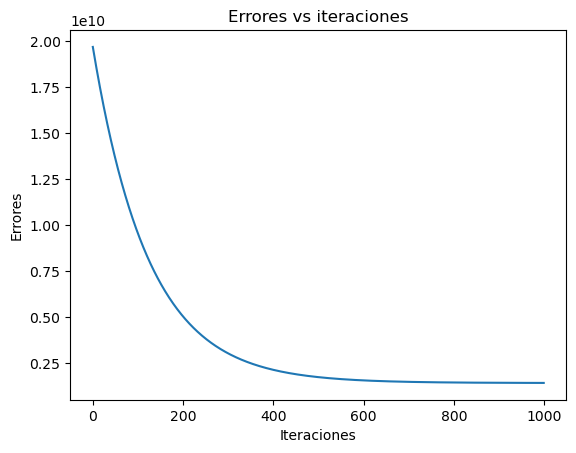

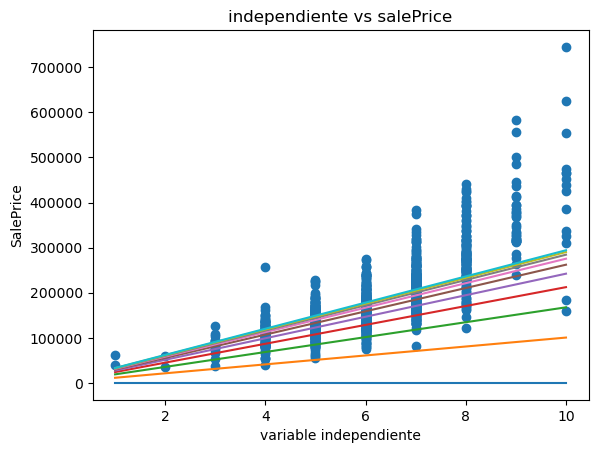

In [22]:
modelos_overallQual, errores_overallQual = regresion_lineal(set_Entrenamiento['OverallQual'],set_Entrenamiento['SalePrice'], 1000, 10, 0.0001)
display_error(errores_overallQual)
recta_data(modelos_overallQual,100,set_Entrenamiento['OverallQual'],set_Entrenamiento['SalePrice'])

## Entrenamiento para la variable independiente 1stFlrSF

Epoch: 0, Error: 19695506210.362156
Epoch: 10, Error: 2734568124.6621556
Epoch: 20, Error: 2113502299.4010582
Epoch: 30, Error: 2090760453.7238255
Epoch: 40, Error: 2089927689.025878
Epoch: 50, Error: 2089897178.3671088
Epoch: 60, Error: 2089896044.1821442
Epoch: 70, Error: 2089895985.687888
Epoch: 80, Error: 2089895966.582655
Epoch: 90, Error: 2089895948.919749


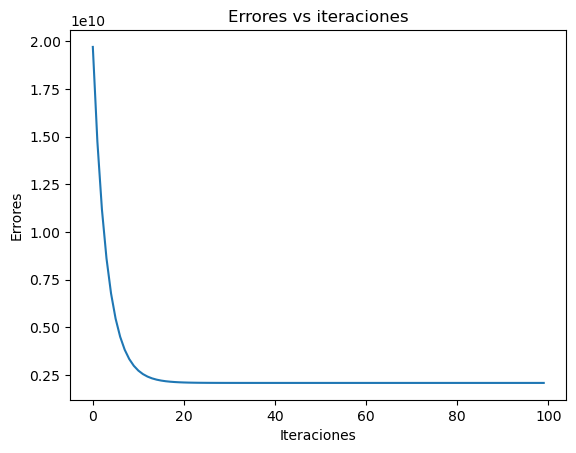

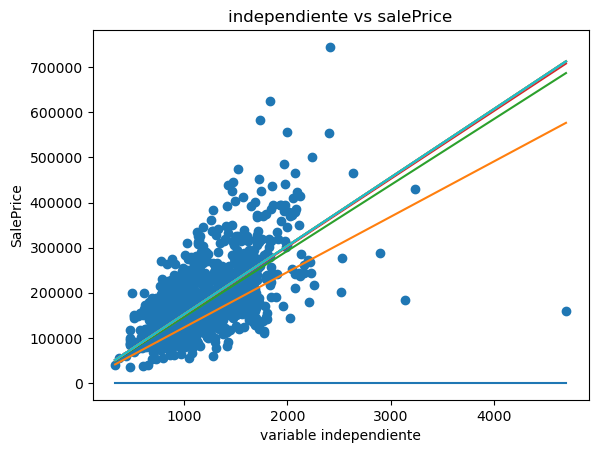

In [23]:
modelos_1stFlrSF, errores_1stFlrSF = regresion_lineal(set_Entrenamiento['1stFlrSF'], set_Entrenamiento['SalePrice'], 100, 10, 0.0000001)
display_error(errores_1stFlrSF)
recta_data(modelos_1stFlrSF, 10, set_Entrenamiento['1stFlrSF'], set_Entrenamiento['SalePrice'])

### instalando scikit-learn

In [24]:
!pip install -U scikit-learn

In [25]:
import sklearn.linear_model as sklm

In [26]:
#set_Entrenamiento['1stFlrSF']
#set_Entrenamiento['OverallQual']
regresionx1 = sklm.LinearRegression().fit(set_Entrenamiento['OverallQual'].values.reshape(-1,1), set_Entrenamiento['SalePrice'].values)
regresionx2 = sklm.LinearRegression().fit(set_Entrenamiento['1stFlrSF'].values.reshape(-1,1), set_Entrenamiento['SalePrice'].values)

In [27]:
def comparacion_modelos(modelo_manual, modelo_scikit, x):
    predicciones_modelo_manual = modelo_manual[0] * x + modelo_manual[1]
    predicciones_modelo_scikit = modelo_scikit.predict(x.values.reshape(-1,1))
    predicciones_promedio = (predicciones_modelo_manual + predicciones_modelo_scikit) / 2
    return predicciones_modelo_manual, predicciones_modelo_scikit, predicciones_promedio

### Predicciones con el 20% de datos de prueba

#### Predicciones para la variable independiente OverallQual

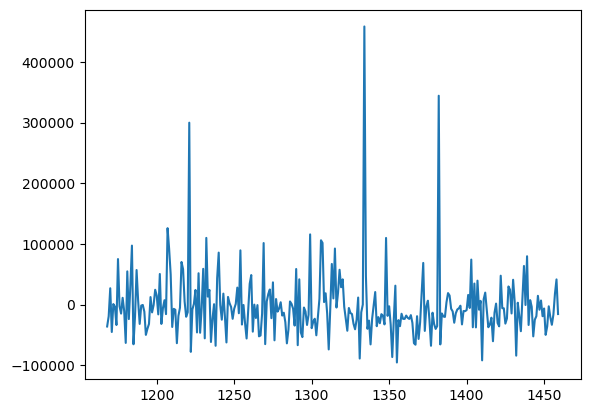

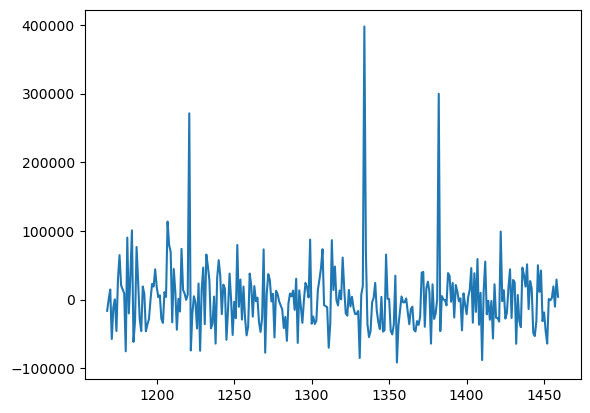

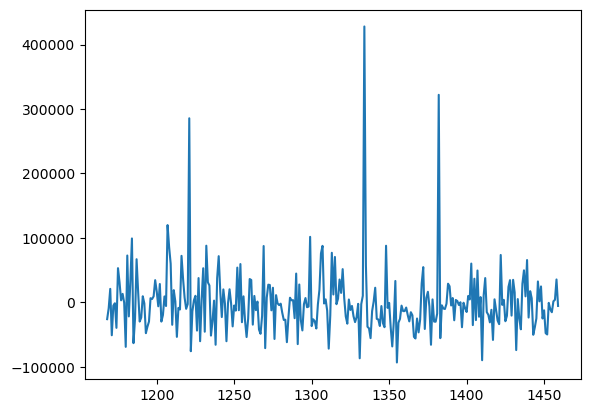

In [28]:
manual_overallQual, scikit_overallQual, promedio_overallQual = comparacion_modelos(list(modelos_overallQual[-1].values())[0], regresionx1, set_validacion['OverallQual'])

n = len(set_validacion['SalePrice'])

arreglo_errores_manual_overallQual = set_validacion['SalePrice'] - manual_overallQual
plt.plot(arreglo_errores_manual_overallQual)
plt.show()

arreglo_errores_scikit_overallQual = set_validacion['SalePrice'] - scikit_overallQual
plt.plot(arreglo_errores_scikit_overallQual)
plt.show()

arreglo_errores_promedio_overallQual = set_validacion['SalePrice'] - promedio_overallQual
plt.plot(arreglo_errores_promedio_overallQual)
plt.show()

In [29]:
error_manual_overallQual = abs(np.sum(set_validacion['SalePrice'] - manual_overallQual) / n)
error_scikit_overallQual = abs(np.sum(set_validacion['SalePrice'] - scikit_overallQual) / n)
error_promedio_overallQual = abs(np.sum(set_validacion['SalePrice'] - promedio_overallQual) / n)

print(error_manual_overallQual)
print(error_scikit_overallQual)
print(error_promedio_overallQual)

2611.858560933222
1165.4750242735643
723.1917683298363


#### Predicciones para la variable independiente 1stFlrSF

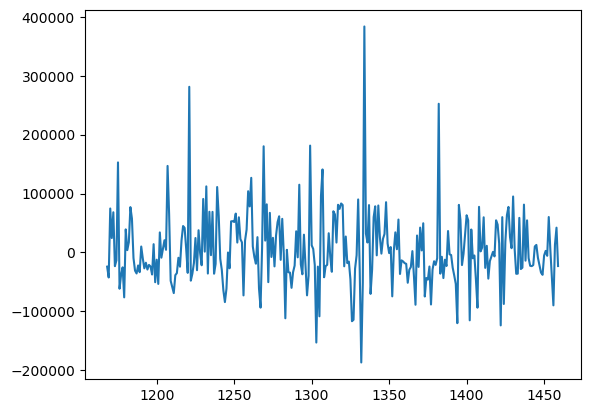

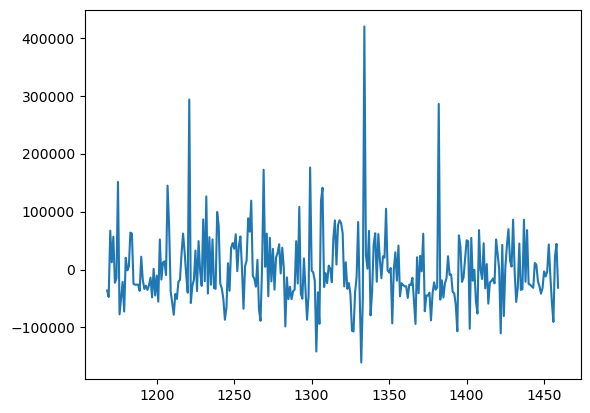

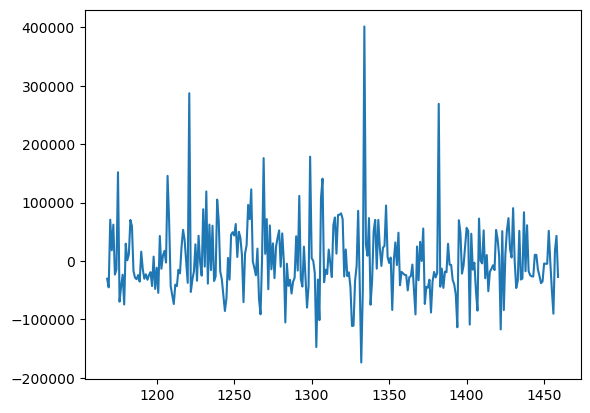

4252.586958224631
1079.615223353634
1586.485867435499


In [30]:
manual_1stFlrSF, scikit_1stFlrSF, promedio_1stFlrSF = comparacion_modelos(list(modelos_1stFlrSF[-1].values())[0], regresionx2, set_validacion['1stFlrSF'])

n = len(set_validacion['SalePrice'])


arreglo_errores_manual_1stFlrSF = set_validacion['SalePrice'] - manual_1stFlrSF
plt.plot(arreglo_errores_manual_1stFlrSF)
plt.show()
arreglo_errores_scikit_1stFlrSF = set_validacion['SalePrice'] - scikit_1stFlrSF
plt.plot(arreglo_errores_scikit_1stFlrSF)
plt.show()
arreglo_errores_promedio_1stFlrSF = set_validacion['SalePrice'] - promedio_1stFlrSF
plt.plot(arreglo_errores_promedio_1stFlrSF)
plt.show()

error_manual_1stFlrSF = abs(np.sum(set_validacion['SalePrice'] - manual_1stFlrSF) / n)
error_scikit_1stFlrSF = abs(np.sum(set_validacion['SalePrice'] - scikit_1stFlrSF) / n)
error_promedio_1stFlrSF = abs(np.sum(set_validacion['SalePrice'] - promedio_1stFlrSF) / n)

print(error_manual_1stFlrSF)
print(error_scikit_1stFlrSF)
print(error_promedio_1stFlrSF)